In [1]:
import pandas as pd

df = pd.read_csv(r'input\train.csv')
numeric_cols = df.select_dtypes(include='number')
mean = numeric_cols.mean()
data = df.fillna(mean)

# 독립변수
X = data.iloc[:, 2:16] # Artist Name, Track Name제외, Class(장르) 제외
# 종속변수
y = data['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14396, 14) (3600, 14) (14396,) (3600,)


In [ ]:
# 커널을 이용하여 분류
from sklearn.svm import SVC # 비선형 분류 지원
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()), # 표준 정규분포(평균 0, 표준편차 1)
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
]) 
# kernel='poly' : 다항식 커널(차원을 올린다)
# degree=3 : 다항식이 3차원
# coef0=1 : 특성 간의 상호작용을 제어 -> 일반적으로 0 또는 1로 설정
# C=5 : 규제(오차) 오차허용 대한 패널티 강도 조절
#       값이 크면 오차를 적게 하려는 쪽으로 작동 --> 훈련데이터에 더 민감 -> 과적합 위험
#       값이 작으면 마진을 넓게 하면서 오차를 허용 --> 일반화 성능 향상

poly_kernel_svm_clf.fit(X_train, y_train) # 학습

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])


In [4]:
poly_kernel_svm_clf.score(X_train, y_train)

0.6250347318699638

In [5]:
poly_kernel_svm_clf.score(X_test, y_test)

0.5036111111111111

In [7]:
# k-means 알고리즘 실습
# 품종 정보가 없을 때 붓꽃 품종을 분할할 수 있을까?
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [8]:
print(iris.feature_names) # 데이터셋 속성명(컬럼명) 출력

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
print(iris.target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# 꽃잎 길이, 꽃잎 너비
iris_petal = iris.data[:, [2, 3]]
labels = iris.target # 품종(target)을 labels에 저장
print(iris_petal)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

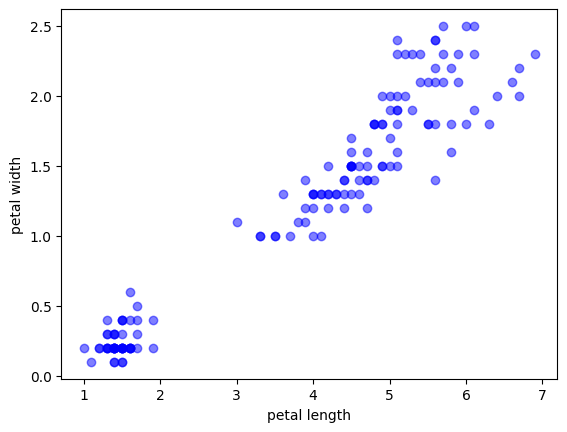

In [14]:
# 데이터 시각화 -> 산점도
import matplotlib.pyplot as plt

x = iris_petal[:, 0] # 길이
y = iris_petal[:, 1] # 너비
plt.scatter(x, y, c='b', alpha=0.5)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [16]:
# k-means 모델 학습
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(iris_petal)

KMeans(n_clusters=3)

In [ ]:
print(kmean.cluster_centers_) # 중심점 좌표
print(kmean.labels_) # 군집결과

[[4.26923077 1.34230769]
 [1.462      0.246     ]
 [5.59583333 2.0375    ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


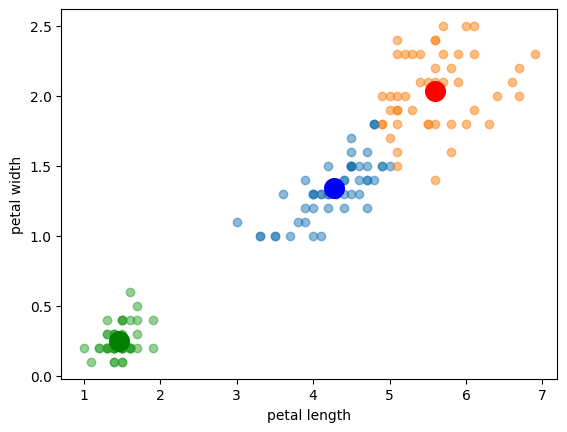

In [21]:
# 결과 시각화
colors = ['tab:blue', 'tab:green', 'tab:orange']
center_colors = ['b', 'g', 'r']
for i in range(len(kmean.labels_)): # 레이블이 붙은 전체 데이터
    label = kmean.labels_[i]
    plt.scatter(iris_petal[i][0], iris_petal[i][1], c=colors[label], alpha=0.5)

# 중심점
for i in range(len(kmean.cluster_centers_)):
    plt.scatter(kmean.cluster_centers_[i][0], kmean.cluster_centers_[i][1], s=200, c=center_colors[i])

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()


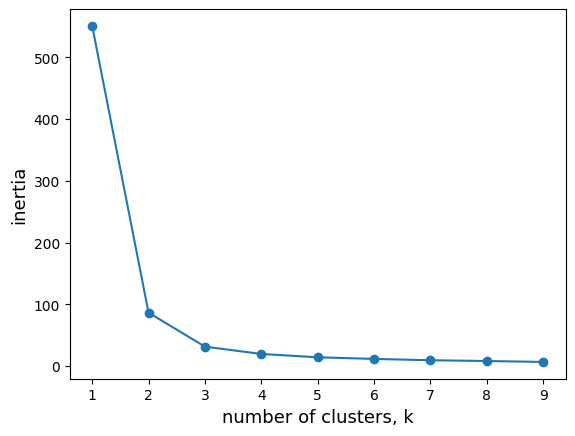

In [22]:
# 최적의 k값과 비교
from sklearn.cluster import KMeans

inertia_a = []
k_range = range(1, 10) # 1 ~ 9
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(iris_petal)
    inertia = kmeans.inertia_ # 이너셔 값을 변수에 저장
    inertia_a.append(inertia) 

# 꺾은 선 그래프
plt.plot(k_range, inertia_a, marker='o')
plt.xlabel('number of clusters, k', fontsize=13)
plt.ylabel('inertia', fontsize=13)
plt.show()


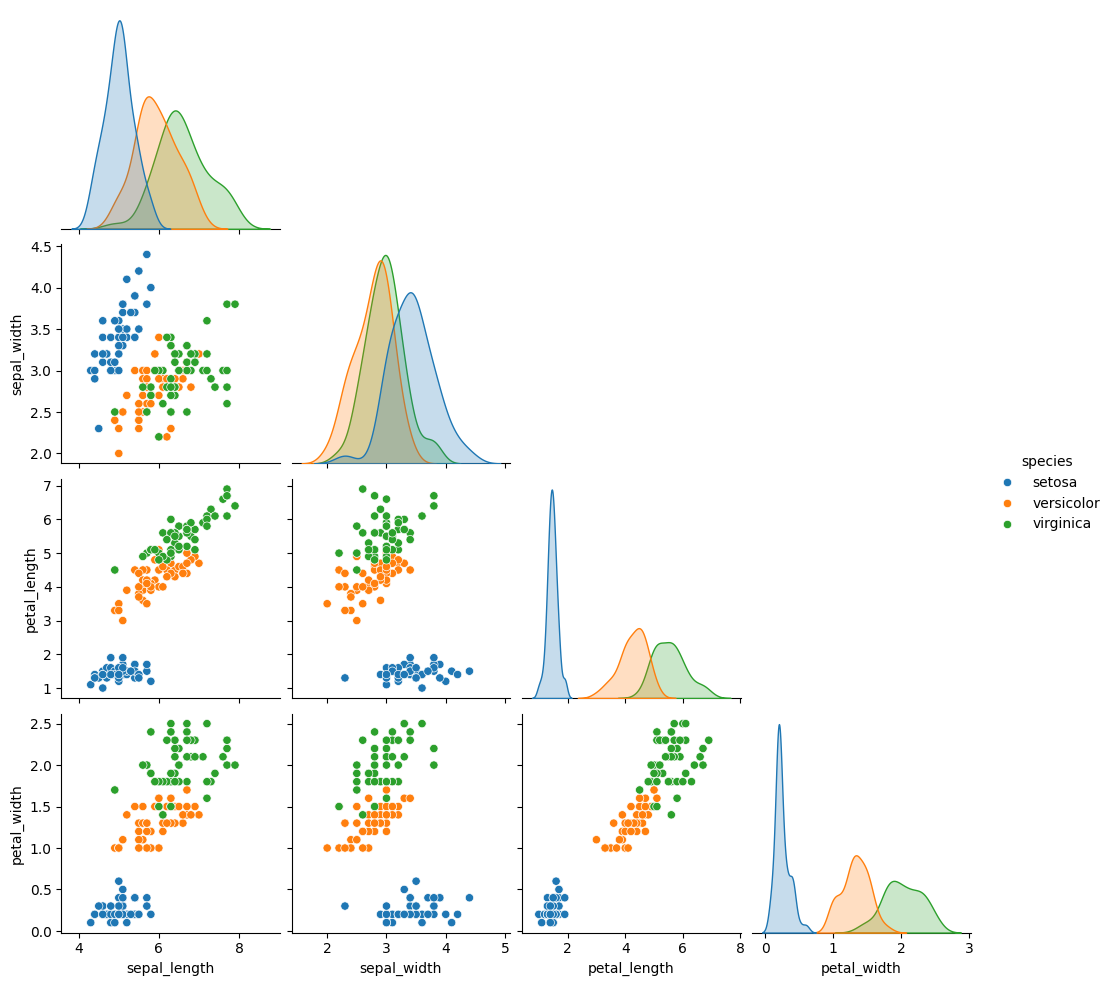

In [ ]:
# 지도학습과 비교하기
# 독립변수가 3개 이상인 경우
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(data=iris, hue='species', corner=True)

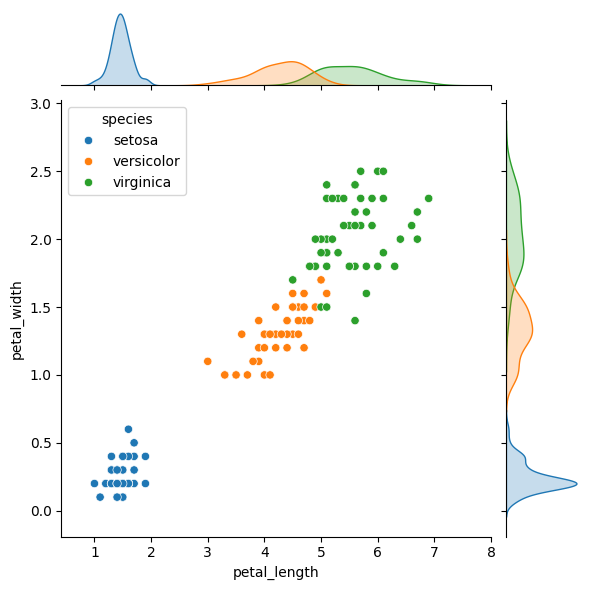

In [26]:
# 독립변수가 2개인 경우
sns.jointplot(data=iris, x='petal_length', y='petal_width', kind='scatter', hue='species')